# 基于 Numpy 的 Python 科学计算入门

<div align=center>
<img width="1000" src="https://github.com/zhaochenyang20/zhaochenyang20.github.io/blob/master/img/profile_4.jpg?raw=true"/>
</div>
<div align=center></div>

**[Eren Zhao](https://zhaochenyang20.github.io/) THU CST Summer Tutorial 2022**

## Intro: Why Numpy?

本课将介绍通过 Python 有效导入、存储和操作内存数据的主要技巧。这个主题非常广泛, 因为数据集的来源与格式都十分丰富, 比如文档集合、图像集合、声音片段集合、数值数据集合, 等等。这些数据虽然存在明显的异构性, 但是将所有数据简单地看作数字数组非常有助于我们理解和处理数据。

例如, 可以将图像（尤其是数字图像）简单地看作二维数字数组, 这些数字数组代表各区 域的像素值; 声音片段可以看作时间和强度的一维数组; 文本也可以通过各种方式转换成 数值表示, 一种可能的转换是用二进制数表示特定单词或单词对出现的频率。不管数据是何种形式, 第一步都是将这些数据转换成数值数组形式的可分析数据。

正因如此, 有效地存储和操作数值数组是数据科学中绝对的基础过程。我们将详细介绍 NumPy。NumPy（Numerical Python 的简称）提供了高效存储和操作密集数据缓存的接口。在某些方面, NumPy 数组与 Python 内置的列表类型非常相似。但是随着数组在维度上变大, NumPy 数组提供了更加高效的存储和数据操作。NumPy 数组几乎是整个 Python 科学计算生态系统的核心。因此, 不管你对数据科学的哪个方面感兴趣, 花点时间学习如何有效地使用 NumPy 都是非常值得的。

如果你听从前言给出的建议安装了 Anaconda, 那么你已经安装好 NumPy, 并可以使用它了。如果你是个体验派, 则可以到 NumPy 网站（http://www.numpy.org/）按照其安装指导进行安装。安装好后, 你可以导入 NumPy 并再次核实你的 NumPy 版本:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.__version__

'1.22.3'

# 内容重点

这份讲义是我~~多年来~~学习中用到的 numpy 的 API 的总结，不得不说非常得多，为此把它们整合为为了查阅的手册。我个人认为，以下内容是你需要清楚理解并且在学习和工作中经常提醒自己的，而其他内容都可以作为工具书来查阅：

- Numpy 和 Python 的效率区别
- Numpy 广播机制的规则
- Numpy Fancy Index
- 传统索引的视图问题

其他的 API 基本是用惯了就记住了，而这三点是绝对的重点，也是我课程的讲课重点。其余自学都没有任何问题。

## Python 数据类型

要实现高效的数据驱动科学和计算，需要理解数据是如何被存储和操作的。本节将介绍在 Python 语言中数据数组是如何被处理的，并对比 NumPy 所做的改进。理解这个不同之处是理解本节其他内容的基础。

Python 的用户往往被其易用性所吸引，其中一个易用之处就在于动态输入。静态类型的语言（如 C 或 Java）往往需要每一个变量都明确地声明，而动态类型的语言（例如 Python）可以跳过这个特殊规定。例如在 C 语言中，你可能会按照如下方式指定一个特殊的操作：

``` c
/* C代码 */
int result = 0;
for(int i=0; i<100; i++){
 result += i;
}
```
而在 Python 中，同等的操作可以按照如下方式实现：

``` Python
# Python代码
result = 0
for i in range(100):
 result += i
```
注意这里最大的不同之处：在 C 语言中，每个变量的数据类型被明确地声明；而在  Python 中，类型是动态推断的。这意味着可以将任何类型的数据指定给任何变量：
``` Python
# Python代码
x = 4
x = "four"

```

这里已经将 x 变量的内容由整型转变成了字符串，而同样的操作在 C 语言中将会导致（取决于编译器设置）编译错误或其他未知的后果：

``` C
/* C代码 */
int x = 4;
x = "four"; // 编译失败
```

这种灵活性是使 Python 和其他动态类型的语言更易用的原因之一。理解这一特性如何工作是学习用 Python 有效且高效地分析数据的重要因素。但是这种类型灵活性也指出了一个事实：Python 变量不仅是它们的值，还包括了关于值的类型的一些额外信息，本节接下来的内容将进行更详细的介绍。

### Python 整型不仅仅是一个整型

标准的 Python 实现是用 C 语言编写的。这意味着每一个 Python 对象都是一个聪明的伪 C 语言结构体，该结构体不仅包含其值，还有其他信息。例如，当我们在 Python 中定义一个整型，例如 x = 10000 时，x 并不是一个“原生”整型，而是一个指针，指向一个 C 语言的复合结构体，结构体里包含了一些值。查看 Python 3.4 的源代码，可以发现整型（长整型）的定义，如下所示（C 语言的宏经过扩展之后）：
```C
struct _longobject {
 long ob_refcnt;
 PyTypeObject *ob_type;
 size_t ob_size;
 long ob_digit[1];
};
```
Python 3.4 中的一个整型实际上包括 4 个部分。

- ob_refcnt 是一个引用计数，它帮助 Python 默默地处理内存的分配和回收。
- ob_type 将变量的类型编码。
- ob_size 指定接下来的数据成员的大小。
- ob_digit 包含我们希望 Python 变量表示的实际整型值。

这意味着与 C 语言这样的编译语言中的整型相比，在 Python 中存储一个整型会有一些开销。

<div align=center>
<img width="500" src="https://zhaochenyang20.github.io/pic/embed/6_29_1.jpg"/>
</div>
<div align=center>C 整型和 Python 整型的区别，这里 PyObject_HEAD 是结构体中包含引用计数、类型编码和其他部分。</div>

两者的差异在于，C 语言整型本质上是对应某个内存位置的标签，里面存储的字节会编码成整型。而 Python 的整型其实是一个指针，指向包含这个 Python 对象所有信息的某个内存位置，其中包括可以转换成整型的字节。由于 Python 的整型结构体里面还包含了大量额外的信息，所以 Python 可以自由、动态地编码。但是，Python 类型中的这些额外信息也会成为负担，在多个对象组合的结构体中尤其明显。

### Python 列表不仅仅是一个列表
设想如果使用一个包含很多 Python 对象的 Python 数据结构，会发生什么？ Python 中的标准可变多元素容器是列表。可以用如下方式创建一个整型值列表：

``` Python
In [1]: L = list(range(10))

In [2]: L
Out[2]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
```

或者创建一个字符串列表：

``` Python
In [4]: L2 = [str(each) for each in L]

In [5]: L2
Out[5]: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]: type(L2[0])
Out[6]: str
```

因为 Python 的动态类型特性，甚至可以创建一个异构的列表：

``` Python
In [7]:  L3 = [True, "2", 3.0, 4]

In [8]: [type(item) for item in L3]
Out[8]: [bool, str, float, int]
```

但是想拥有这种灵活性也是要付出一定代价的：为了获得这些灵活的类型，列表中的每一项必须包含各自的类型信息、引用计数和其他信息；也就是说，每一项都是一个完整的 Python 对象。来看一个特殊的例子，如果列表中的所有变量都是同一类型的，那么很多信息都会显得多余——将数据存储在固定类型的数组中应该会更高效。动态类型的列表和固定类型的（NumPy 式）数组间的区别如下图所示。

<div align=center>
<img width="500" src="https://zhaochenyang20.github.io/pic/embed/6_29_2.jpg"/>
</div>
<div align=center>numpy 列表和 Python 列表的区别。</div>

在实现层面，数组基本上包含一个指向连续数据块的指针。另一方面，Python 列表包含一个指向指针块的指针，这其中的每一个指针对应一个完整的 Python 对象（如前面看到的 Python 整型）。另外，列表的优势是灵活，因为每个列表元素是一个包含数据和类型信息的完整结构体，而且列表可以用任意类型的数据填充。固定类型的 NumPy 式数组缺乏这种灵活性，但是能更有效地存储和操作数据。

## 为何 numpy 会更快？
Python 的默认实现（被称作 CPython）处理起某些操作时非常慢，一部分原因是该语言的动态性和解释性——数据类型灵活的特性决定了序列操作不能像 C 语言和 Fortran 语言一样被编译成有效的机器码。目前，有一些项目试图解决 Python 这一弱点，比较知名的包括：PyPy 项目（http://pypy.org/）。一个实时的 Python 编译实现；Cython 项目（http://cython.org），将 Python 代码转换成可编译的 C 代码；Numba 项目（http://numba.pydata.org/），将 Python 代码的片段转换成快速的 LLVM 字节码。以上这些项目都各有其优势和劣势，但是比较保守地说，这些方法中还没有一种能达到或超过标准 CPython 引擎的受欢迎程度。

我们具体来展示和理解下 CPython 的缓慢——

Python 的相对缓慢通常出现在很多小操作需要不断重复的时候，比如对数组的每个元素做循环操作时。假设有一个数组，我们想计算每个元素的倒数，一种直接的解决方法是：

In [2]:
import numpy as np
np.random.seed(0)
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

这种实现方式可能对于有 C 语言或 Java 背景的人来说非常自然，但是如果测试一个很大量的输入数据运行上述代码的时间，这一操作将非常耗时，并且是超出意料的慢！我们用 IPython 的 %timeit 魔法函数来测量：

In [7]:
big_array_numpy = np.random.randint(1, 100, size=1000000)
big_array_list = list(big_array_numpy)
%timeit compute_reciprocals(big_array_numpy)
%timeit compute_reciprocals(big_array_list)

1.84 s ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.82 s ± 34.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


完成百万次上述操作并存储结果花了几秒钟的时间！在手机都以 Giga-FLOPS（即每秒十亿次浮点运算，一个有趣的对比是当年阿姆斯特朗飞到月球所需要的算力基本等于一部智能手机的算力）为单位计算处理速度时，上面的处理结果所花费的时间确实是不合时宜的慢。事实上，这里的处理瓶颈并不是运算本身，而是 CPython 在每次循环时必须做数据类型的检查和函数的调度。每次进行倒数运算时，Python 首先检查对象的类型，并且动态查找可以使用该数据类型的正确函数。如果我们在编译代码时进行这样的操作，那么就能在代码执行之前知晓类型的声明，结果的计算也会更加有效率。

在上方的例子里，你可能看不出 numpy 的明显优势，但是毕竟这还是在显示地运行 for 循环，而 numpy 的快速主要体现在有着遍历性质的通用函数对 numpy 数组的巨幅加成上。

先扯到这里，我们开始正式入门。

# 创建和生成

本节主要介绍 array 的创建和生成。为什么会把这个放在最前面呢？主要有以下两个方面原因：

- 在实际工作过程中，我们时不时需要验证或查看 array 相关的 API 或互操作。
- 有时候在使用 sklearn，matplotlib，PyTorch，Tensorflow 等工具时也需要一些简单的数据进行实验。

所以，先学会如何快速拿到一个 array 是有很多益处的。本节我们主要介绍以下几种常用的创建方式：

- 使用列表或元组
- 使用 arange
- 使用 linspace/logspace
- 使用 ones/zeros
- 使用 random
- 从文件读取

其中，最常用的一般是 linspace/logspace 和 random，前者常常用在画坐标轴上，后者则用于生成「模拟数据」。举例来说，当我们需要画一个函数的图像时，X 往往使用 linspace 生成，然后使用函数公式求得 Y，再 plot；当我们需要构造一些输入（比如 X）或中间输入（比如 Embedding、hidden state）时，random 会异常方便。

### 从 python 列表或元组创建

⭐⭐

重点掌握传入 list 创建一个 array 即可：`np.array(list)`

⚠️ 需要注意的是：「数据类型」。如果您足够仔细的话，可以发现下面第二组代码第 2 个数字是「小数」（注：Python 中 1. == 1.0），而 array 是要保证每个元素类型相同的，所以会帮您把 array 转为一个 float 的类型。

In [8]:
# 一个 list
np.array([1,2,3])

array([1, 2, 3])

In [9]:
# 二维（多维类似）
# 注意，有一个小数
np.array([[1, 2., 3], [4, 5, 6]])

array([[1., 2., 3.],
       [4., 5., 6.]])

In [10]:
# 你也可以指定数据类型
np.array([1, 2, 3], dtype=np.float16)

array([1., 2., 3.], dtype=float16)

In [11]:
# 如果指定了 dtype，输入的值都会被转为对应的类型，而且不会四舍五入
lst = [
    [1, 2, 3],
    [4, 5, 6.8]
]
np.array(lst, dtype=np.int32)

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [15]:
# 一个 tuple
np.asarray((1.1, 2.2))

array([1.1, 2.2])

In [13]:
# tuple，一般用 list 就好，不需要使用 tuple
np.array([(1.1, 2.2, 3.3), (4.4, 5.5, 6.6)])

array([[1.1, 2.2, 3.3],
       [4.4, 5.5, 6.6]])

至于 asarray 和 array 的区别：

array 和 asarray 都可以将结构数据转化为 ndarray，但是主要区别就是当数据源是 ndarray 时，array 会 copy 出一个副本，占用新的内存，但 asarray 不会。

In [14]:
arr1 = np.array([1, 2, 3])
arr2 = np.array(arr1)
arr3 = np.asarray(arr1)
arr2[1] = 10
print(arr1)
arr3[1] = 10
print(arr1)

[1 2 3]
[ 1 10  3]


## 使用 arange 生成

⭐⭐

range 是 Python 内置的整数序列生成器，arange 是 numpy 的，效果类似，会生成一维的向量。我们偶尔会需要使用这种方式来构造 array，比如：

需要创建一个连续一维向量作为输入（比如编码位置时可以使用）需要观察筛选、抽样的结果时，有序的 array 一般更加容易观察

⚠️ 需要注意的是：在 reshape 时，目标的 shape 需要的元素数量一定要和原始的元素数量相等。

In [16]:
np.arange(12).reshape(3, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [17]:
# 注意，是小数
np.arange(12.0).reshape(4, 3)

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [18]:
np.arange(100, 124, 2).reshape(3, 2, 2)

array([[[100, 102],
        [104, 106]],

       [[108, 110],
        [112, 114]],

       [[116, 118],
        [120, 122]]])

In [19]:
# shape size 相乘要和生成的元素数量一致
np.arange(100., 124., 2).reshape(2,3,4)

ValueError: cannot reshape array of size 12 into shape (2,3,4)

### 使用 linspace/logspace 生成

⭐⭐⭐

OK，这是我们遇到的第一个比较重要的 API，前者需要传入 3 个参数：开头，结尾，数量；后者需要额外传入一个 base，它默认是 10。

⚠️ 需要注意的是：第三个参数并**不是**步长。

In [20]:
# 线性
print(np.linspace(0, 9, 10).reshape(2, 5, 1))
np.linspace(0, 9, 10).reshape(1, 2, 5)

[[[0.]
  [1.]
  [2.]
  [3.]
  [4.]]

 [[5.]
  [6.]
  [7.]
  [8.]
  [9.]]]


array([[[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]]])

In [21]:
np.linspace(0, 9, 6).reshape(2, 3)

array([[0. , 1.8, 3.6],
       [5.4, 7.2, 9. ]])

接下来是 logspace，注意其意义就是按照[指数线性](https://zhaochenyang20.github.io/2022/01/08/%E9%9A%8F%E7%AC%94/%E5%BF%83%E5%BF%83%E5%BF%B5%E5%BF%B5/%E9%9F%B3%E4%B9%90%E4%B8%AD%E7%9A%84%E6%95%B0%E7%90%86%E9%80%BB%E8%BE%91/)来生成数据。

In [28]:
# 指数 base 默认为 10
print(np.logspace(0, 9, 6, base=np.e))
print(np.log(np.logspace(0, 9, 6, base=np.e)))
print(np.logspace(0, 9, 6, base=10))
print(np.log10(np.logspace(0, 9, 6, base=10)))

[1.00000000e+00 6.04964746e+00 3.65982344e+01 2.21406416e+02
 1.33943076e+03 8.10308393e+03]
[0.  1.8 3.6 5.4 7.2 9. ]
[1.00000000e+00 6.30957344e+01 3.98107171e+03 2.51188643e+05
 1.58489319e+07 1.00000000e+09]
[0.  1.8 3.6 5.4 7.2 9. ]


下面我们更进一步看一下：

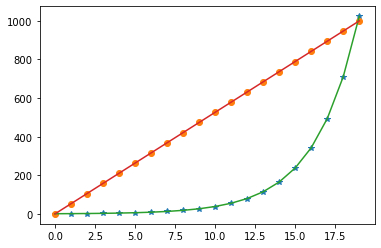

In [31]:
N = 20
x = np.arange(N)
y1 = np.linspace(0, 10, N) * 100
y2 = np.logspace(0, 10, N, base=2)

plt.plot(x, y2, '*');
plt.plot(x, y1, 'o');
#! 划线
plt.plot(x, y2);
plt.plot(x, y1);

In [33]:
# 检查每个元素是否为 True
# base 的 指数为 linspace 得到的就是 logspace
N = 20
y2 = np.logspace(0, 10, N, base=2)
np.alltrue(2 ** np.linspace(0, 10, N)  == y2)

True

>⚠️ 补充：关于 array 的条件判断

In [34]:
# 不能直接用 if 判断 array 是否符合某个条件
arr = np.array([1, 2, 3])
cond1 = arr > 2
cond1

array([False, False,  True])

In [35]:
if cond1:
    print("forbid")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [36]:
# 即便你全是 True 它也不行
arr = np.array([1, 2, 3])
cond2 = arr > 0
if cond2:
    print("forbid")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [37]:
# 只能用 any 或 all，这个很容易犯错，请务必注意。
if cond1.any():
    print("if any")

if any


In [38]:
if cond2.all():
    print("all conform")

all conform


### 使用 ones/zeros 创建

⭐

创建全 1/0 array 的快捷方式。需要注意的是 `np.zeros_like` 或 `np.ones_like`，二者可以快速生成给定 array 一样 shape 的 0 或 1 向量，这在需要 Mask 某些位置时可能会用到。

⚠️ 需要注意的是：创建出来的 array 默认是 float 类型。

In [39]:
np.ones(3)

array([1., 1., 1.])

In [40]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [41]:
np.zeros((2, 3, 4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [43]:
# 像给定向量那样的 0 向量（ones_like 是 1 向量）
print(np.zeros_like(np.ones((2, 3, 3))))

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


### 使用 random 生成

⭐⭐⭐⭐⭐

如果要在这一节选一个最重要的 API，那一定是 `random` 无疑了，这里我们只介绍几个比较常用的「生产」数据相关的 API。它们经常用于随机生成训练或测试数据，神经网络初始化等。

⚠️ 需要注意的是：这里我们统一推荐使用新的 API 方式创建，即通过 `np.random.default_rng()` 先生成 `Generator`，然后再在此基础上生成各种分布的数据（记忆更加简便清晰）。不过我们依然会介绍就的 API 用法，因为很多代码中使用的还是旧的，您可以混个眼熟。

In [44]:
# 0-1 连续均匀分布
np.random.rand(2, 3)

array([[0.54422614, 0.7771694 , 0.17419901],
       [0.70917992, 0.44169007, 0.24421882]])

In [45]:
# 单个数
np.random.rand()

0.5064066705679392

In [46]:
# 0-1 连续均匀分布
np.random.random((3, 2))

array([[0.60052534, 0.62961777],
       [0.6097588 , 0.98259692],
       [0.81380663, 0.90393871]])

In [47]:
# 指定上下界的连续均匀分布
np.random.uniform(-1, 1, (2, 3))

array([[-0.70988965,  0.61189297, -0.0014294 ],
       [ 0.16404608, -0.99240214, -0.26983641]])

In [49]:
# 上面两个的区别是 shape 的输入方式不同，无伤大雅了
# 不过从 1.17 版本后推荐这样使用（以后大家可以用新的方法）
# rng 是个 Generator，可用于生成各种分布
#! 42 是随机数种子，众所周知，计算机是完全不存在随机的，指定相同的随机数种子，我们会生成相同的随机结果
rng = np.random.default_rng(42)
rng

Generator(PCG64) at 0x7F7908077580

In [50]:
# 推荐的连续均匀分布用法
rng.random((2, 3))

array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235]])

In [51]:
# 可以指定上下界，所以更加推荐这种用法
rng.uniform(0, 1, (2, 3))

array([[0.7611397 , 0.78606431, 0.12811363],
       [0.45038594, 0.37079802, 0.92676499]])

In [53]:
# 随机整数（离散均匀分布），不超过给定的值（10）
print(np.random.randint(100, size=(2, 3, 4)))
rng.integers(100, size=(2, 3, 4))

[[[ 7 12 27 48]
  [58 98 27  1]
  [57 45  5 68]]

 [[28 19 15 42]
  [28 93  3 32]
  [58 89 94 32]]]


array([[[67, 77, 75, 19],
        [36, 46, 49,  4],
        [54, 15, 74, 68]],

       [[92, 74, 36, 96],
        [41, 32, 90, 37],
        [ 7, 46, 79, 18]]])

In [54]:
# 随机整数（离散均匀分布），指定上下界和 shape
np.random.randint(0, 10, (2, 3))

array([[8, 4, 7],
       [4, 5, 3]])

In [55]:
# 上面推荐的方法，指定大小和上界
rng.integers(10, size=2)

array([4, 1])

In [56]:
# 上面推荐的方法，指定上下界
rng.integers(0, 10, (2, 3))

array([[6, 4, 3],
       [2, 5, 6]])

In [57]:
# 标准正态分布
np.random.randn(2, 4)

array([[ 1.00598973, -2.32839773,  0.8845468 , -0.01272806],
       [ 0.49565494, -1.40539762,  1.79185433,  0.36375782]])

In [58]:
# 上面推荐的标准正态分布用法
rng.standard_normal((2, 4))

array([[ 0.74325417,  0.54315427, -0.66550971,  0.23216132],
       [ 0.11668581,  0.2186886 ,  0.87142878,  0.22359555]])

In [59]:
# 高斯分布
np.random.normal(0, 1, (3, 5))

array([[-0.9099195 ,  0.40175023,  0.2742747 , -0.76010006,  0.33305447],
       [ 0.36653939,  0.40263391,  2.12750154,  0.45131352, -0.5574691 ],
       [-0.84153653, -0.09624566,  0.83520801,  0.02640151,  0.65957284]])

In [60]:
# 上面推荐的高斯分布用法
rng.normal(0, 1, (3, 5))

array([[ 0.67891356,  0.06757907,  0.2891194 ,  0.63128823, -1.45715582],
       [-0.31967122, -0.47037265, -0.63887785, -0.27514225,  1.49494131],
       [-0.86583112,  0.96827835, -1.68286977, -0.33488503,  0.16275307]])

总之，一般会用的就是2个分布：均匀分布和正态（高斯）分布。另外，`size` 可以指定 shape。

In [61]:
# 离散均匀分布
rng.integers(low=0, high=10, size=5)

array([5, 5, 0, 5, 7])

In [62]:
# 正态（高斯）分布
rng.normal(loc=0.0, scale=1.0, size=(2, 3))

array([[-0.34872507, -0.46235179,  0.85797588],
       [-0.19130432, -1.27568632, -1.13328721]])

In [63]:
# 连续均匀分布
rng.uniform(low=0, high=10, size=5)

array([0.58302742, 2.81383892, 2.93593758, 6.61916515, 5.57032152])

### 从文件读取

⭐⭐⭐⭐⭐


这小节主要用于加载实现存储好的权重参数或预处理好的数据集，有时候会比较方便，比如训练好的模型参数加载到内存里用来提供推理服务，或者耗时很久的预处理数据直接存起来，多次实验时不需要重新处理。

⚠️ 需要注意的是：存储时不需要写文件名后缀，会自动添加。
在[人智导](https://github.com/zhaochenyang20/IAI_2022)中可以优雅地使用，但是请自行学习 `allow_pickle` 参数，此处给出[输入法大作业](https://github.com/zhaochenyang20/IAI_2022/blob/main/homework/input-method/src/pinyin.py)里的一个例子：
``` Python
dictionary = np.load(Path.cwd() / "dictionary.npz", allow_pickle=True)["dic"].item()
one, two, three = [Counter(each[1].item()) for each in np.load(Path.cwd() / "full_set.npz", allow_pickle=True).items()]
```

In [65]:
# 直接将给定矩阵存为 a.npy
np.save('./a', np.array([[1, 2, 3], [4, 5, 6]]))

In [89]:
# 可以将多个矩阵存在一起，名为 `b.npz`
np.savez("./b", a=np.arange(12).reshape(3, 4), 字典=np.arange(12.).reshape(4, 3))

In [79]:
# 和上一个一样，只是压缩了
np.savez_compressed("./c", a=np.arange(12).reshape(3, 4), c=np.arange(12.).reshape(4, 3))

In [80]:
# 加载单个 array
np.load("./a.npy")

array([[1, 2, 3],
       [4, 5, 6]])

In [91]:
# 加载多个，可以像字典那样取出对应的 array
arr = np.load("./b.npz")

In [92]:
# 可以直接使用 npz、npb 的名称进行加载
arr["字典"]

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [93]:
for key in arr:
    print(key)

a
字典


## 统计和属性

本节我们从 array 的基本统计属性入手，对刚刚创建的 array 进一步的了解。主要包括以下几个方面：

- 尺寸相关
- 最大、最小、中位、分位值
- 平均、求和、标准差等

都是描述性统计相关的指标，对于我们从整体了解一个 array 很有帮助。其中，用到最多的是尺寸相关的「`shape`」，最大、最小值，平均值、求和等。

本节的内容非常简单，您只需要特别关注（记住）两个重要的特性：

- 按维度（指定 axis）求结果。一般 0 表示列 1 表示行，可以用「**沿着行/列操作**」这样理解，不确定时可以拿个例子试一下。
- 计算后保持维度（`keepdims=True`）


**另外，为了便于操作，我们使用一个随机生成的 array 作为操作对象；同时，我们指定了 seed，这样每次运行，每个人看到的结果都是一样的。一般我们在训练模型时，往往需要指定 seed，这样才能在「同等条件」下进行调参。**

In [94]:
#  先创建一个 Generator
rng = np.random.default_rng(seed=42)
#  再生成一个均匀分布
arr = rng.uniform(0, 1, (3, 4))
arr

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499]])

### 尺寸相关

⭐⭐

这一小节主要包括：维度、形状和数据量，其中形状 `shape` 我们用到的最多。

⚠️ 需要注意的是：size 不是 shape。而 ndim 表示有几个维度。

In [96]:
# 维度，array 是二维的（两个维度）
arr.ndim

2

#### `np.shape`

In [97]:
# 形状，返回一个 Tuple
arr.shape

(3, 4)

In [98]:
# 数据量
arr.size

12

### 最值分位

⭐⭐⭐

这一小节主要包括：最大值、最小值、中位数、其他分位数，其中『**最大值和最小值**』我们平时用到的最多。

⚠️ 需要注意的是：分位数可以是 0-1 的任意小数（表示对应分位），而且分位数并不一定在原始的 array 中。

In [99]:
# 所有元素中最大的
arr.max()

0.9756223516367559

In [100]:
# 按维度（列）最大值
arr.max(axis=0)

array([0.77395605, 0.97562235, 0.85859792, 0.92676499])

In [101]:
# 同理，按行
arr.max(axis=1)

array([0.85859792, 0.97562235, 0.92676499])

In [102]:
# 是否保持原来的维度
# 这个需要特别注意下，很多深度学习模型中都需要保持原有的维度进行后续计算
# arr.min 的维度是 (3,1)，array 的 shape 是 (3,4)，按行，同时保持了行的维度
arr.min(axis=1, keepdims=True)

array([[0.43887844],
       [0.09417735],
       [0.12811363]])

In [103]:
# 保持维度：（1，4），原始array是（3，4）
arr.min(axis=0, keepdims=True)

array([[0.09417735, 0.43887844, 0.37079802, 0.69736803]])

In [104]:
# 一维了
arr.min(axis=0, keepdims=False)

array([0.09417735, 0.43887844, 0.37079802, 0.69736803])

In [105]:
# 中位数
# 其他用法和 max，min 是一样的
np.median(arr)

0.7292538655248584

In [106]:
# 分位数，注意，分位数可以是 0-1 之间的任何数字（分位）
# 如果是 1/2 分位，那正好是中位数
np.quantile(arr, q=1/2, axis=1, keepdims=True)

array([[0.73566204],
       [0.773602  ],
       [0.41059198]])

### 平均求和标准差

⭐⭐⭐

这一小节主要包括：平均值、累计求和、方差、标准差等进一步的统计指标。其中使用最多的是「平均值」。

In [107]:
# 平均值
np.average(arr)

0.6051555606435642

In [108]:
# 按维度平均（列）
np.average(arr, axis=0)

array([0.33208234, 0.62162891, 0.66351188, 0.80339911])

In [109]:
# 另一个计算平均值的 API
# 它与 average 的主要区别是，np.average 可以指定权重，即可以用于计算加权平均
# 一般建议使用 average，忘掉 mean 吧！
np.mean(arr, axis=0)

array([0.33208234, 0.62162891, 0.66351188, 0.80339911])

#### `np.sum`

In [110]:
# 求和，不多说了，类似
np.sum(arr, axis=1)

array([2.76880044, 2.61700371, 1.87606258])

In [111]:
np.sum(arr, axis=1, keepdims=True)

array([[2.76880044],
       [2.61700371],
       [1.87606258]])

In [112]:
# 按列累计求和
np.cumsum(arr, axis=0)

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.8681334 , 1.41450079, 1.61973762, 1.48343233],
       [0.99624703, 1.86488673, 1.99053565, 2.41019732]])

In [113]:
# 按行累计求和
np.cumsum(arr, axis=1)

array([[0.77395605, 1.21283449, 2.07143241, 2.76880044],
       [0.09417735, 1.0697997 , 1.8309394 , 2.61700371],
       [0.12811363, 0.57849957, 0.94929759, 1.87606258]])

In [114]:
# 标准差，用法类似
np.std(arr)

0.28783096517727075

In [115]:
# 按列求标准差
np.std(arr, axis=0)

array([0.3127589 , 0.25035525, 0.21076935, 0.09444968])

In [116]:
# 方差
np.var(arr, axis=1)

array([0.02464271, 0.1114405 , 0.0839356 ])

## 形状和转换

array 大多数情况下都是以多维的形式出现的，一般对超过二维的多维 array 称为「张量」，二维矩阵，一维向量。因为多维度，所以自然而然地涉及到形状的改变和转换，可以算是张量最基础的「操作」了。

本节我们主要涉及以下三个方面：

- 改变形状
- 反序
- 转置

其中，改变形状和转置都非常常用，我们建议您熟练掌握。

### 改变形状

⭐⭐⭐⭐⭐

这小节里面的 API 使用非常高频，尤其是扩展 1 维度的 `expand_dims` 和去除 1 维度的 `squeeze`，您未来会在很多神经网络架构中看到这俩货的身影。

⚠️ 需要注意的是：无论是扩展还是缩减，多或少的 shape 都是 1，`squeeze` 时如果指定维度，则该维度 shape 必须是 1。

In [118]:
# 换个整数的随机 array
rng = np.random.default_rng(seed=42)
arr = rng.integers(1, 100, (3, 4, 2))
print(arr)
print("arr[0]")
print(arr[0])
print("arr[:, 0]")
print(arr[:, 0])
print("arr[:, :, 0]")
print(arr[:, :, 0])

[[[ 9 77]
  [65 44]
  [43 86]
  [ 9 70]]

 [[20 10]
  [53 97]
  [73 76]
  [72 78]]

 [[51 13]
  [84 45]
  [50 37]
  [19 92]]]
arr[0]
[[ 9 77]
 [65 44]
 [43 86]
 [ 9 70]]
arr[:, 0]
[[ 9 77]
 [20 10]
 [51 13]]
arr[:, :, 0]
[[ 9 65 43  9]
 [20 53 73 72]
 [51 84 50 19]]


In [120]:
# 有时候您可能需要将多维 array 打平
arr = arr.ravel()
print(arr)
print(arr.shape)

[ 9 77 65 44 43 86  9 70 20 10 53 97 73 76 72 78 51 13 84 45 50 37 19 92]
(24,)


#### `np.expand_dims`

In [124]:
#### 扩展 1 个维度，需要（必须）指定维度
# 其实就是多嵌套了一下
arr = rng.integers(1, 100, (3, 4))
print(arr)
print("----------------------------------------------------")
print(arr[0])
print("----------------------------------------------------")
print(arr[:, 0])
print("----------------------------------------------------")
print(arr.shape)
print("----------------------------------------------------")
arr = np.expand_dims(arr, 0)
print(arr.shape)
print("----------------------------------------------------")
print(arr[0])
print("----------------------------------------------------")
print(arr[:, 0])
print("----------------------------------------------------")
print(arr)
print("----------------------------------------------------")

[[92 74 37 96]
 [41 33 90 37]
 [ 8 47 79 19]]
----------------------------------------------------
[92 74 37 96]
----------------------------------------------------
[92 41  8]
----------------------------------------------------
(3, 4)
----------------------------------------------------
(1, 3, 4)
----------------------------------------------------
[[92 74 37 96]
 [41 33 90 37]
 [ 8 47 79 19]]
----------------------------------------------------
[[92 74 37 96]]
----------------------------------------------------
[[[92 74 37 96]
  [41 33 90 37]
  [ 8 47 79 19]]]
----------------------------------------------------


# 通用函数
到目前为止，我们讨论了 NumPy 的一些基础知识。在接下来的几小节中，我们将深入了解 NumPy 在 Python 数据科学世界中如此重要的原因。明确点说，NumPy 提供了一个简单灵活的接口来优化数据数组的计算。

NumPy 数组的计算有时非常快，有时也非常慢。使 NumPy 变快的关键是利用向量化操作，通常在 NumPy 的通用函数（ufunc）中实现。本节将介绍 NumPy 通用函数的重要性——它可以提高数组元素的重复计算的效率；然后，将会介绍很多 NumPy 包中常用且有用的数学通用函数。

我们再回顾下之前求倒数的例子：

In [125]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

NumPy 为很多类型的操作提供了非常方便的、静态类型的、可编译程序的接口，也被称作向量操作。你可以通过简单地对数组执行操作来实现，这里对数组的操作将会被用于数组中的每一个元素。这种向量方法被用于将循环推送至 NumPy 之下的编译层，这样会取得更快的执行效率。

比较如下结果：

In [126]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


In [127]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)
%timeit (1.0 / big_array)

1.86 s ± 49.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
694 µs ± 174 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [128]:
%time compute_reciprocals(big_array)
%time (1.0 / big_array)

CPU times: user 1.83 s, sys: 11.7 ms, total: 1.85 s
Wall time: 1.85 s
CPU times: user 812 µs, sys: 145 µs, total: 957 µs
Wall time: 676 µs


array([0.1       , 0.01190476, 0.04545455, ..., 0.01428571, 0.01098901,
       0.01149425])

NumPy 中的向量操作是通过通用函数实现的。通用函数的主要目的是对 NumPy 数组中的值执行更快的重复操作。它非常灵活，前面我们看过了标量和数组的运算，但是也可以对两个数组进行运算：

In [129]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

通用函数并不仅限于一维数组的运算，它们也可以进行多维数组的运算：

In [130]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

通过通用函数用向量的方式进行计算几乎总比用 Python 循环实现的计算更加有效，尤其是当数组很大时。只要你看到 Python 脚本中有这样的循环，就应该考虑能否用向量方式替换这个循环。

给出一些例子，具体的请查阅相关资料：

$$
\begin{array}{lll}

\end{array}
$$
$$
\begin{equation}

\begin{array}{lll}
\hline \text { 运算符 } & \text { 对应的通用函数 } & \text { 描述 } \\
\hline+ & n p . a d d & \text { 加法运算 }(\text { 即 } 1+1=2) \\
- & n p . \text { subtract } & \text { 减法运算 }(\text { 即 } 3-2=1) \\
- & \text { np.negative } & \text { 负数运算 }(\text { 即 }-2) \\

* & \text { np.multiply } & \text { 乘法运算 }(\text { 即 } 2 * 3=6) \\

/ & \text { np.divide } & \text { 除法运算 }(\text { 即 } 3 / 2=1.5) \\

/ / & \text { np.floor}\text {divide } & \text { 地板除法运算 (floor division，即 } 3 / / 2=1) \\

\text { ** } & \text { np.power } & \text { 指数运算 }(\text { 即 } 2 * * 3=8) \\

\% & \text { np.mod } & \text { 模 / 余数 }(\text { 即 } 9 \% 4=1) \\

\hline

\end{array}

\end{equation}
$$

专用的通用函数
除了以上介绍到的，NumPy 还提供了很多通用函数，包括双曲三角函数、比特位运算、比较运算符、弧度转化为角度的运算、取整和求余运算，等等。浏览 NumPy 的文档将会揭示很多有趣的功能。

还有一个更加专用，也更加晦涩的通用函数优异来源是子模块 scipy.special。如果你希望对你的数据进行一些更晦涩的数学计算，scipy.special 可能包含了你需要的计算函数。

这些函数能列一个长长的列表，下面的代码片段展示了一些可能在统计学中用到的函数：

In [131]:
from scipy import special
# Gamma函数（广义阶乘，generalized factorials）和相关函数
x = [1, 5, 10]
print("gamma(x) =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2) =", special.beta(x, 2))
 # 误差函数（高斯积分）
 # 它的实现和它的逆实现
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x) =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

gamma(x) = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2) = [0.5        0.03333333 0.00909091]
erf(x) = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


NumPy 和 scipy.special 中提供了大量的通用函数，这些包的文档在网上就可以查到，搜索“gamma function python”即可。

## 高级的通用函数特性

1. 指定输出

在进行大量运算时，有时候指定一个用于存放运算结果的数组是非常有用的。不同于创建临时数组，你可以用这个特性将计算结果直接写入到你期望的存储位置。所有的通用函数都可以通过 out 参数来指定计算结果的存放位置：

In [165]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y) 
print(y)

[ 0. 10. 20. 30. 40.]


这个特性也可以被用作数组视图，例如可以将计算结果写入指定数组的每隔一个元素的位置：

In [166]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


如果这里写的是 y[::2] = 2 ** x，那么结果将是创建一个临时数组，该数组存放的是2 ** x 的结果，并且接下来会将这些值复制到 y 数组中。对于上述例子中比较小的计算量来说，这两种方式的差别并不大。但是对于较大的数组，通过慎重使用 out 参数将能够有效节约内存。

2.聚合

二元通用函数有些非常有趣的聚合功能，这些聚合可以直接在对象上计算。例如，如果我们希望用一个特定的运算 reduce 一个数组，那么可以用任何通用函数的 reduce 方法。一个 reduce 方法会对给定的元素和操作重复执行，直至得到单个的结果。

In [167]:
x = np.arange(1, 6)
print(np.add.reduce(x))
print(np.add.accumulate(x))

15
[ 1  3  6 10 15]


3. 外积

有点类似张亮积。

In [168]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

## 广播机制
我们在前一节中介绍了 NumPy 如何通过通用函数的向量化操作来减少缓慢的 Python 循环，另外一种向量化操作的方法是利用 NumPy 的广播功能。广播可以简单理解为用于不同大小数组的二进制通用函数（加、减、乘等）的一组规则。

In [132]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

还可以自动扩充计算

In [133]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## 规则！

NumPy 的广播遵循一组严格的规则，设定这组规则是为了决定两个数组间的操作。

- 规则 1：如果两个数组的维度数不相同，那么小维度数组的形状将会在最左边补 1

- 规则 2：如果两个数组的形状在任何一个维度上都不匹配，那么数组的形状会沿着维度为 1 的维度扩展以匹配另外一个数组的形状

- 规则 3：如果两个数组的形状在任何一个维度上都不匹配并且没有任何一个维度等于 1，那么会引发异常

In [134]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [135]:
M = np.ones((3, 2))
a = np.arange(3)
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

## 广播的实际运用

1. 数组的归一化

In [140]:
X = np.random.random((10, 3))
Xmean = X.mean(axis=0)
X_centered = X - Xmean
X_centered.mean(axis=0)

array([-9.99200722e-17,  3.33066907e-17,  0.00000000e+00])

在机器精度范围内，该均值为 0。

2. 绘制二维函数

广播另外一个非常有用的地方在于，它能基于二维函数显示图像。比如我们希望定义一个函数 $z = f (x, y)$，可以用广播沿着数值区间计算该函数：

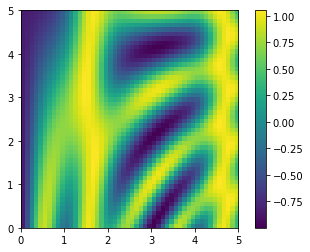

In [141]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
plt.imshow(z, extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar()
plt.show()

### 反序

⭐

也可以看作是一种对原数组的转换，用的不多，可以了解一下，为接下来的索引和切片做个热身。

如果给一个字符串或数组让您反序，您可能会想到很多种方法，比如：`reversed`，或者写一个方法，或者用 Python list 的索引功能，而这也是 `numpy` 中 array 反序的方式。

In [142]:
# 字符串
s = "uevol"
s[::-1]

'loveu'

In [143]:
# 数组
lst = [1, "1", 5.2]
lst[::-1]

[5.2, '1', 1]

In [160]:
arr = np.random.randint(1, 100, (3, 4))
print(arr)

[[49 81 30 11]
 [54 17 22 45]
 [34  5 40  9]]


In [161]:
# 我们按上面的套路：默认列反序
arr[::-1]

array([[34,  5, 40,  9],
       [54, 17, 22, 45],
       [49, 81, 30, 11]])

In [162]:
# 列不变行反序
arr[::-1, :]

array([[34,  5, 40,  9],
       [54, 17, 22, 45],
       [49, 81, 30, 11]])

In [163]:
# 在不同维度上操作：行不变列反序
arr[:, ::-1]

array([[11, 30, 81, 49],
       [45, 22, 17, 54],
       [ 9, 40,  5, 34]])

In [164]:
# 行变列也变
arr[::-1, ::-1]

array([[ 9, 40,  5, 34],
       [45, 22, 17, 54],
       [11, 30, 81, 49]])

### 转置

⭐⭐⭐

转置是线性代数的基本操作，拿二维矩阵为例，通俗理解就是把它放倒，shape 反转，行变成列，列成为行。当然，对于多维也是类似的，需要里理解他们的数学意义，这里不做展开。我们建议您二维矩阵用 `arr.T`（会快很多），超过二维的张量可以用 `np.transpose`，会更加灵活些。

⚠️ 需要注意的是：一维数组转置还是自己。

In [169]:
# 一维
print("----------------------------------------------------")
print(np.array([[1, 2, 3]]))
print("----------------------------------------------------")
print(np.array([[1, 2, 3]]).shape)
print("----------------------------------------------------")
print(np.array([[1, 2, 3]]).T)
print("----------------------------------------------------")
print(np.array([[1,2, 3]]).T.shape)

[[1 2 3]]
(1, 3)
[[1]
 [2]
 [3]]
(3, 1)


In [171]:
# 简便用法，把所有维度顺序都给倒过来
rng = np.random.default_rng(seed=42)
arr = rng.integers(1, 100, (3, 4))
print("----------------------------------------------------")
print(arr)
print("----------------------------------------------------")
print(arr.shape)
print("----------------------------------------------------")
print(arr.T)
print("----------------------------------------------------")
print(arr.T.shape)

----------------------------------------------------
[[ 9 77 65 44]
 [43 86  9 70]
 [20 10 53 97]]
----------------------------------------------------
(3, 4)
----------------------------------------------------
[[ 9 43 20]
 [77 86 10]
 [65  9 53]
 [44 70 97]]
----------------------------------------------------
(4, 3)


In [172]:
# 将 shape=(1,1,3,4) 的转置后得到 shape=(4,3,1,1)
arr.reshape(1, 1, 3, 4).T.shape

(4, 3, 1, 1)

In [173]:
# 同上
arr.reshape(1, 2, 2, 1, 3, 1).T.shape

(1, 3, 1, 2, 2, 1)

#### `np.transpose`

In [174]:
# 这种转置方式可以指定 axes
np.transpose(arr)

array([[ 9, 43, 20],
       [77, 86, 10],
       [65,  9, 53],
       [44, 70, 97]])

In [175]:
# 不指定 axes 时和 .T 是一样的
np.transpose(arr.reshape(1, 2, 2, 1, 3, 1)).shape

(1, 3, 1, 2, 2, 1)

In [181]:
# 指定 axes，不过 axes 数量必须包含所有维度的序列
# 比如两个维度就是 (0, 1)，四个就是 (0, 1, 2, 3)
# 当然，顺序可以改变，比如下面就是只转置第 2 个和第 3 个维度
# 注意，只有超过 2 维时，这样才有意义
# 下面的结果中，中间2个维度被调换顺序了，顺序就在axes中指定的
print("----------------------------------------------------")
print(arr.reshape(1, 1, 3, 4))
print("----------------------------------------------------")
print(arr.reshape(1, 1, 3, 4).shape)
print("----------------------------------------------------")
print(np.transpose(arr.reshape(1, 1, 3, 4), (0, 2, 1, 3)))
print("----------------------------------------------------")
print(np.transpose(arr.reshape(1, 1, 3, 4), axes=(0, 2, 1, 3)).shape)
print("----------------------------------------------------")

----------------------------------------------------
[[[[ 9 77 65 44]
   [43 86  9 70]
   [20 10 53 97]]]]
----------------------------------------------------
(1, 1, 3, 4)
----------------------------------------------------
[[[[ 9 77 65 44]]

  [[43 86  9 70]]

  [[20 10 53 97]]]]
----------------------------------------------------
(1, 3, 1, 4)
----------------------------------------------------


## 分解和组合

这节我们主要学习 array 的分解和组合，本节是所有章节中最重要的一节，通过本节内容，您可以充分了解 `numpy`（以及 Python 语言）的强大，这种操作上的优雅不能说后无来者，但至少前无古人了。

内容大致包括以下小节：

- 切片和索引
- 拼接
- 重复
- 分拆

其中，重中之重是「切片和索引」，它基础、它高频、它无处不在。我们强烈建议您熟练掌握，其他三个相对简单，只需要各记住一个 API 即可。

### 切片和索引

⭐⭐⭐⭐⭐

划重点！切片和索引是通过对已有 array 进行操作而得到想要的「部分」元素的行为过程。其核心动作可以概括为：按维度根据 `start:stop:step` 操作 array。

这部分内容的核心是把处理按维度分开，不处理的维度统一用 `:` 或 `...` 代替；在看操作时，也要首先关注「`,`」在哪里。要处理的维度和之前 `arange` `linspace` 等接口使用方法是一样的。

⚠️ 需要注意的是：引支持负数，即从后往前索引。

传统的索引前面其实有讲过不少，可以自行参考 list 的切片和索引。在传统的索引上，我需要重点强调下这个话题：

> 关于数组切片有一点很重要非常有用，那就是数组切片返回的是数组数据的视图(也可以理解成引用)，而不是数值数据的副本。这一点也是 NumPy 数组切片和 Python 列表切片的不同之处。在 Python 列表中，切片是值的副本。具体可以查看下方例子：

In [182]:
rng = np.random.default_rng(seed=42)
x2 = rng.integers(10, size=(3, 4))
print("----------------------------------------------------")
print(x2)
x3 = x2[0]
x4 = x2[:, 0]
print("----------------------------------------------------")
print("__slice__")
print("----------------------------------------------------")
print(x3)
print("----------------------------------------------------")
print(x4)
x3[0] = 1
print("----------------------------------------------------")
print("__change the line__")
print("----------------------------------------------------")
print(x2)
print("----------------------------------------------------")
x4[2] = 10
print("__change the column__")
print("----------------------------------------------------")
print(x2)
print("----------------------------------------------------")

----------------------------------------------------
[[0 7 6 4]
 [4 8 0 6]
 [2 0 5 9]]
----------------------------------------------------
__slice__
----------------------------------------------------
[0 7 6 4]
----------------------------------------------------
[0 4 2]
----------------------------------------------------
__change the line__
----------------------------------------------------
[[1 7 6 4]
 [4 8 0 6]
 [2 0 5 9]]
----------------------------------------------------
__change the column__
----------------------------------------------------
[[ 1  7  6  4]
 [ 4  8  0  6]
 [10  0  5  9]]
----------------------------------------------------


In [183]:
lecturer_list = ["c7w", "lambda", "Alan", "xsun2001", "ayf"]
bachelordom_list = lecturer_list[:-2]
print("----------------------------------------------------")
print(bachelordom_list)
print("----------------------------------------------------")
bachelordom_list[-1] = "Eren"
print(bachelordom_list)
print("----------------------------------------------------")
print(lecturer_list)
print("----------------------------------------------------")

----------------------------------------------------
['c7w', 'lambda', 'Alan']
----------------------------------------------------
['c7w', 'lambda', 'Eren']
----------------------------------------------------
['c7w', 'lambda', 'Alan', 'xsun2001', 'ayf']
----------------------------------------------------


### Fancy Indexing

你应该知道如何利用简单的索引值（如 arr[0]）、切片（如 arr[:5]）获得并修改部分数组。在这一节中，我们将介绍另外一种数组索引，也称作花哨的索引（fancy indexing）。花哨的索引和前面那些简单的索引非常类似，但是传递的是索引数组，而不是单个标量。花哨的索引让我们能够快速获得并修改复杂的数组值的子数据集。

#### 操作布尔数组

之前介绍了通用函数，并且特别关注了算术运算符。我们看到用 +、-、*、/ 和其他一些运算符实现了数组的逐元素操作。NumPy 还实现了如 <（小于）和 >（大于）的逐元素比较的通用函数。这些比较运算的结果是一个布尔数据类型的数组。一共有 6 种标准的比较操作：

In [236]:
x = np.array([1, 2, 3, 4, 5])

In [237]:
x < 3  # less than

array([ True,  True, False, False, False])

In [238]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [239]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [240]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [241]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [242]:
x == 3  # equal

array([False, False,  True, False, False])

和算术运算通用函数一样，这些比较运算通用函数也可以用于任意形状、大小的数组。给定一个布尔数组，你可以实现很多有用的操作。首先打印出二维数组 x：

In [244]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

你当然可以直接对布尔数组进行聚合计算，这里不再赘述，然而我们讨论更强大的工具——

用布尔数组作为掩码，通过该掩码选择数据的子数据集。以前面小节用过的 x 数组为例，假设我们希望抽取出数组中所有小于 5 的元素：

In [245]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

现在返回的是一个一维数组，它包含了所有满足条件的值。换句话说，所有的这些值是掩码数组对应位置为 True 的值。

通过将布尔操作、掩码操作和聚合结合，可以快速查看数据集内的数据属性。

#### 探索花哨的索引

花哨的索引在概念上非常简单，它意味着传递一个索引数组来一次性获得多个数组元素。

例如以下数组：

In [246]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


假设我们希望获得三个不同的元素，可以用以下方式实现：

In [247]:
[x[3], x[7], x[2]]

[71, 86, 14]

利用花哨的索引，结果的形状与索引数组的形状一致，而不是与被索引数组的形状一致：

In [249]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

花哨的索引也对多个维度适用。假设我们有以下数组：

In [250]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

和标准的索引方式一样，第一个索引指的是行，第二个索引指的是列：

In [251]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

另外一种方法是通过传递索引的单个列表或数组来获得同样的结果：

In [248]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

这里需要注意，结果的第一个值是 X[0, 2]，第二个值是 X[1, 1]，第三个值是 X[2, 3]在花哨的索引中，索引值的配对遵循介绍过的广播的规则。因此当我们将一个列向量和一个行向量组合在一个索引中时，会得到一个二维的结果：

In [252]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

这里，每一行的值都与每一列的向量配对，正如我们看到的广播的算术运算：

In [253]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

这里特别需要记住的是，花哨的索引返回的值反映的是广播后的索引数组的形状，而不是被索引的数组的形状。

#### 组合索引

花哨的索引可以和其他索引方案结合起来形成更强大的索引操作：

In [254]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


可以将花哨的索引和简单的索引组合使用：

In [255]:
X[2, [2, 0, 1]]

array([10,  8,  9])

也可以将花哨的索引和切片组合使用：

In [256]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

更可以将花哨的索引和掩码组合使用：

In [257]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

索引选项的组合可以实现非常灵活的获取和修改数组元素的操作

### 拼接

⭐⭐⭐⭐

有时候我们需要对已有的几个 array 进行拼接以形成一个大的 array（常见的例子比如不同类型特征的拼接）。本小节严格来说只有两个 API：`np.concatenate` 和 `np.stack`，前者是拼接，后者是堆叠（会增加一个维度），都可以指定维度。记住，有它俩就够了。

⚠️ 需要注意的是：`hstack` 和 `vstack` 和 `stack` 没关系。

In [184]:
rng = np.random.default_rng(42)

arr1 = rng.random((2, 3))
arr2 = rng.random((2, 3))
print("----------------------------------------------------")
print(arr1)
print("----------------------------------------------------")
print(arr2)
print("----------------------------------------------------")
print(arr1.shape)
print("----------------------------------------------------")
print(arr2.shape)
print("----------------------------------------------------")

----------------------------------------------------
[[0.77395605 0.43887844 0.85859792]
 [0.69736803 0.09417735 0.97562235]]
----------------------------------------------------
[[0.7611397  0.78606431 0.12811363]
 [0.45038594 0.37079802 0.92676499]]
----------------------------------------------------
(2, 3)
----------------------------------------------------
(2, 3)
----------------------------------------------------


In [185]:
# 默认沿axis=0（列）连接
print("----------------------------------------------------")
print(np.concatenate((arr1, arr2)))
print("----------------------------------------------------")
print(np.concatenate((arr1, arr2)).shape)
print("----------------------------------------------------")
print(np.concatenate((arr1, arr2), axis=1))
print("----------------------------------------------------")
print(np.concatenate((arr1, arr2), axis=1).shape)
print("----------------------------------------------------")

----------------------------------------------------
[[0.77395605 0.43887844 0.85859792]
 [0.69736803 0.09417735 0.97562235]
 [0.7611397  0.78606431 0.12811363]
 [0.45038594 0.37079802 0.92676499]]
----------------------------------------------------
(4, 3)
----------------------------------------------------
[[0.77395605 0.43887844 0.85859792 0.7611397  0.78606431 0.12811363]
 [0.69736803 0.09417735 0.97562235 0.45038594 0.37079802 0.92676499]]
----------------------------------------------------
(2, 6)
----------------------------------------------------


In [188]:
# 竖直按行顺序拼接
# 注意：vstack 虽然看起来是 stack，但其实它是 concatenate，建议您只使用 np.concatenate
print("----------------------------------------------------")
print(np.hstack((arr1, arr2)).shape)
print("----------------------------------------------------")
print(np.vstack((arr1, arr2)).shape)
print("----------------------------------------------------")

----------------------------------------------------
(2, 6)
----------------------------------------------------
(4, 3)
----------------------------------------------------


In [189]:
# 堆叠，默认根据 axis=0 进行
np.stack((arr1, arr2))

array([[[0.77395605, 0.43887844, 0.85859792],
        [0.69736803, 0.09417735, 0.97562235]],

       [[0.7611397 , 0.78606431, 0.12811363],
        [0.45038594, 0.37079802, 0.92676499]]])

In [190]:
_.shape

(2, 2, 3)

In [191]:
# 堆叠，根据 axis=2
print("----------------------------------------------------")
print(np.stack((arr1, arr2), axis=1))
print("----------------------------------------------------")
print(np.stack((arr1, arr2), axis=1).shape)
print("----------------------------------------------------")
print(np.stack((arr1, arr2), axis=2))
print("----------------------------------------------------")
print(np.stack((arr1, arr2), axis=2).shape)
print("----------------------------------------------------")

----------------------------------------------------
[[[0.77395605 0.43887844 0.85859792]
  [0.7611397  0.78606431 0.12811363]]

 [[0.69736803 0.09417735 0.97562235]
  [0.45038594 0.37079802 0.92676499]]]
----------------------------------------------------
(2, 2, 3)
----------------------------------------------------
[[[0.77395605 0.7611397 ]
  [0.43887844 0.78606431]
  [0.85859792 0.12811363]]

 [[0.69736803 0.45038594]
  [0.09417735 0.37079802]
  [0.97562235 0.92676499]]]
----------------------------------------------------
(2, 3, 2)
----------------------------------------------------


### 重复

⭐⭐⭐

重复其实是另一种拼接方式，它也可以指定要重复的维度。在有些深度学习模型数据构建中非常有用（方便）。

⚠️ 需要注意的是：是一个维度一个维度依次重复，而不是整个 array 重复。

In [192]:
rng = np.random.default_rng(42)
arr = rng.integers(0, 10, (3, 4))
arr

array([[0, 7, 6, 4],
       [4, 8, 0, 6],
       [2, 0, 5, 9]])

In [193]:
# 在 axis=0（沿着列）上重复 2 次
np.repeat(arr, 2, axis=0)

array([[0, 7, 6, 4],
       [0, 7, 6, 4],
       [4, 8, 0, 6],
       [4, 8, 0, 6],
       [2, 0, 5, 9],
       [2, 0, 5, 9]])

In [194]:
# 在 axis=1（沿着行）上重复 3 次
np.repeat(arr, 3, axis=1)

array([[0, 0, 0, 7, 7, 7, 6, 6, 6, 4, 4, 4],
       [4, 4, 4, 8, 8, 8, 0, 0, 0, 6, 6, 6],
       [2, 2, 2, 0, 0, 0, 5, 5, 5, 9, 9, 9]])

### 分拆

⭐⭐⭐

有拼接堆叠自然就有拆分，注意这不是切片和索引，就是将 array 拆成想要的几份。用的不是特别多，API 只要记住 `np.split` 就行了，其他的都是快捷方式。

⚠️ 需要注意的是：分拆的 axis 是对该维度进行拆分。

In [195]:
rng = np.random.default_rng(42)
arr = rng.integers(1, 100, (6, 4))
arr

array([[ 9, 77, 65, 44],
       [43, 86,  9, 70],
       [20, 10, 53, 97],
       [73, 76, 72, 78],
       [51, 13, 84, 45],
       [50, 37, 19, 92]])

#### `np.split`

In [196]:
# 默认切分列（axis=0），切成 3 份
np.split(arr, 3)

[array([[ 9, 77, 65, 44],
        [43, 86,  9, 70]]),
 array([[20, 10, 53, 97],
        [73, 76, 72, 78]]),
 array([[51, 13, 84, 45],
        [50, 37, 19, 92]])]

In [197]:
# （axis=1）切分行
np.split(arr, 2, axis=1)

[array([[ 9, 77],
        [43, 86],
        [20, 10],
        [73, 76],
        [51, 13],
        [50, 37]]),
 array([[65, 44],
        [ 9, 70],
        [53, 97],
        [72, 78],
        [84, 45],
        [19, 92]])]

In [198]:
# 和上面的一个效果
np.vsplit(arr, 3)

[array([[ 9, 77, 65, 44],
        [43, 86,  9, 70]]),
 array([[20, 10, 53, 97],
        [73, 76, 72, 78]]),
 array([[51, 13, 84, 45],
        [50, 37, 19, 92]])]

In [200]:
# 等价的用法
np.hsplit(arr, 2)

[array([[ 9, 77],
        [43, 86],
        [20, 10],
        [73, 76],
        [51, 13],
        [50, 37]]),
 array([[65, 44],
        [ 9, 70],
        [53, 97],
        [72, 78],
        [84, 45],
        [19, 92]])]

## 筛选和过滤

这小节与索引和切片有点类似，但倾向于从「整体」中统一筛选出「符合条件」的内容，而索引和切片更多的是依照「某种方法」切出一块内容。本小节内容同样非常重要，可以算第二个最重要的小节。主要包括以下内容：

- 条件筛选
- 提取（按条件）
- 抽样（按分布）
- 最大最小 index（特殊值）

这几个内容都很重要，使用的也非常高频。条件筛选经常用于 Mask 或异常值处理，提取则常用于结果过滤，抽样常用在数据生成（比如负样本抽样），最大最小 index 则常见于机器学习模型预测结果判定中（根据最大概率所在的 index 决定结果属于哪一类）。

In [201]:
rng = np.random.default_rng(42)
arr = rng.integers(1, 100, (3, 4))
arr

array([[ 9, 77, 65, 44],
       [43, 86,  9, 70],
       [20, 10, 53, 97]])

### 条件筛选

⭐⭐⭐

顾名思义，根据一定的条件对 array 进行筛选（标记）并后续处理。核心 API 是 `np.where`。

⚠️ 需要注意的是：where 分别返回各维度的 index，赋值的是「不满足」条件的。

In [203]:
# 条件筛选，可以直接在整个 array 上使用条件
arr > 50

array([[False,  True,  True, False],
       [False,  True, False,  True],
       [False, False,  True,  True]])

In [204]:
# 返回满足条件的索引，因为是两个维度，所以会返回两组结果
np.where(arr > 50)

(array([0, 0, 1, 1, 2, 2]), array([1, 2, 1, 3, 2, 3]))

In [205]:
# 不满足条件的赋值，将 <=50 的替换为 -1
np.where(arr > 50, arr, -1)

array([[-1, 77, 65, -1],
       [-1, 86, -1, 70],
       [-1, -1, 53, 97]])

### 提取

⭐

在 array 中提取指定条件的值。

⚠️ 需要注意的是：提取和唯一值返回的都是一维向量。

In [206]:
# 提取指定条件的值
np.extract(arr > 50, arr)

array([77, 65, 86, 70, 53, 97])

In [207]:
# 唯一值，是另一种形式的提取
np.unique(arr)

array([ 9, 10, 20, 43, 44, 53, 65, 70, 77, 86, 97])

### 抽样

⭐⭐⭐⭐⭐

我们在跑模型时常常需要使用部分数据对整个过程快速验证，您当然可以使用 `np.random` 生成模拟数据。但有真实数据时，从真实数据中随机抽样会比较好。

⚠️ 需要注意的是：抽样的集合要求为一维向量（一般是数据的 index）。

In [208]:
rng = np.random.default_rng(42)
# 第一个参数是要抽样的集合，如果是一个整数，则表示从 0 到该值
# 第二个参数是样本大小
# 第三个参数表示结果是否可以重复
# 第四个参数表示出现的概率，长度和第一个参数一样

# 由于（0 1 2 3）中 2 和 3 的概率比较高，自然就选择了 2 和 3
rng.choice(4, 2, replace=False, p=[0.1, 0.2, 0.3, 0.4])
lst = ["la", "vida", "sola", "vivras"]
rng.choice(lst, 4, replace=False)

array(['vida', 'vivras', 'la', 'sola'], dtype='<U6')

In [209]:
# 旧的 API
# 如果是抽样语料的 index，更多的方法是这样：
data_size = 10000
np.random.choice(data_size, 50, replace=False)

array([3711, 5502, 4383, 8491, 8931, 3725, 5223, 2632, 4078, 3705, 5488,
       9326, 9338, 3762, 6538, 6579, 3238,   61, 7129, 7451, 6321, 3881,
       8517, 6892, 2657, 4858, 6629, 9335, 3288, 2620,   90, 8999, 4165,
       7333, 8764, 9840, 4517, 8409, 1938, 3730, 2372, 8088, 7804, 9017,
       6956, 6413,  147, 5721, 6089, 8900])

### 最值 Index

⭐⭐⭐⭐⭐

这小节主要是两个 API：`np.argmax(min)` 和 `np.argsort`，当然最常用的还是第一个，不用说，自然是可以（需要）指定 axis 的。

In [210]:
rng = np.random.default_rng(42)
arr = rng.uniform(1, 100, (3, 4))
arr

array([[77.62164881, 44.44896554, 86.00119407, 70.03943488],
       [10.32355744, 97.58661281, 76.3528305 , 78.82036622],
       [13.68324963, 45.58820785, 37.7090044 , 92.7497339 ]])

#### `np.argmax/argmin`

In [211]:
# 所有值中最大值的 Index，基本不这么用
np.argmax(arr)

5

In [212]:
# 按列（axis=0）最大值的 Index
np.argmax(arr, axis=0)

array([0, 1, 0, 2])

In [213]:
# 按行（axis=1）最小值的 Index
np.argmin(arr, axis=1)

array([1, 0, 0])

#### `np.argsort`

In [215]:
# 默认按行（axis=1）排序的索引
np.argsort(arr)

array([[1, 3, 0, 2],
       [0, 2, 3, 1],
       [0, 2, 1, 3]])

In [216]:
# 数据按行（axis=1）排序的索引，同上
print(np.argsort(-arr, axis=1))
print(np.argsort(arr, axis=1))

[[2 0 3 1]
 [1 3 2 0]
 [3 1 2 0]]
[[1 3 0 2]
 [0 2 3 1]
 [0 2 1 3]]


In [217]:
# 数据按列（axis=0）排序索引
np.argsort(arr, axis=0)

array([[1, 0, 2, 0],
       [2, 2, 1, 1],
       [0, 1, 0, 2]])

## 矩阵和运算

这一节我们将聚焦矩阵和相关的运算，主要包括：

- 算术（四则运算及其他基础算术）
- 广播
- 矩阵相关

这些内容其实使用非常普遍，普遍到我们甚至都不会察觉到自己在使用，而且也非常简单。当然，高纬度的计算我们这里并不涉及，但逻辑是一致的，只是更加复杂。

### 算术

⭐⭐⭐⭐

所有的算术函数均可直接运用于 array。

⚠️ 需要注意的是：`mod` 运算可以指定多个被除数。

In [218]:
rng = np.random.default_rng(42)
arr = rng.integers(1, 20, (3, 4))
arr

array([[ 2, 15, 13,  9],
       [ 9, 17,  2, 14],
       [ 4,  2, 11, 19]])

In [219]:
# +-*/ 四则运算，就跟两个数字计算一样
arr * 2

array([[ 4, 30, 26, 18],
       [18, 34,  4, 28],
       [ 8,  4, 22, 38]])

In [220]:
# 平方也可以
arr ** 2

array([[  4, 225, 169,  81],
       [ 81, 289,   4, 196],
       [ 16,   4, 121, 361]])

In [221]:
# 开方
np.sqrt(arr)

array([[1.41421356, 3.87298335, 3.60555128, 3.        ],
       [3.        , 4.12310563, 1.41421356, 3.74165739],
       [2.        , 1.41421356, 3.31662479, 4.35889894]])

In [222]:
# log
np.log(arr)

array([[0.69314718, 2.7080502 , 2.56494936, 2.19722458],
       [2.19722458, 2.83321334, 0.69314718, 2.63905733],
       [1.38629436, 0.69314718, 2.39789527, 2.94443898]])

In [223]:
# 超过5的都换成5
np.minimum(arr, 5)

array([[2, 5, 5, 5],
       [5, 5, 2, 5],
       [4, 2, 5, 5]])

In [224]:
# 低于5的都换成5
np.maximum(arr, 5)

array([[ 5, 15, 13,  9],
       [ 9, 17,  5, 14],
       [ 5,  5, 11, 19]])

In [225]:
# 四舍五入
np.round(np.sqrt(arr), 2)

array([[1.41, 3.87, 3.61, 3.  ],
       [3.  , 4.12, 1.41, 3.74],
       [2.  , 1.41, 3.32, 4.36]])

In [226]:
# floor/ceil
np.floor(np.sqrt(arr))

array([[1., 3., 3., 3.],
       [3., 4., 1., 3.],
       [2., 1., 3., 4.]])

In [227]:
np.ceil(np.sqrt(arr))

array([[2., 4., 4., 3.],
       [3., 5., 2., 4.],
       [2., 2., 4., 5.]])

In [228]:
# mod <=> x % 3
np.mod(arr, 3)

array([[2, 0, 1, 0],
       [0, 2, 2, 2],
       [1, 2, 2, 1]])

In [229]:
arr - 5

array([[-3, 10,  8,  4],
       [ 4, 12, -3,  9],
       [-1, -3,  6, 14]])

In [230]:
# 还可以使用多个被除数
np.mod(arr, arr - 5)

array([[-1,  5,  5,  1],
       [ 1,  5, -1,  5],
       [ 0, -1,  5,  5]])

### 矩阵

⭐⭐⭐⭐⭐

这一小节主要介绍线性代数中矩阵的处理，我们会介绍几个矩阵相关常用的 API。

⚠️ 需要注意的是：`dot` 和 `matmul` 在高维度时表现不同。

In [231]:
rng = np.random.default_rng(42)
a = rng.integers(1, 10, (3, 2))
b = rng.integers(1, 10, (2, 4))
c = rng.integers(1, 10, (3, 3))
a, b, c

(array([[1, 7],
        [6, 4],
        [4, 8]]),
 array([[1, 7, 2, 1],
        [5, 9, 7, 7]]),
 array([[7, 8, 5],
        [2, 8, 5],
        [5, 4, 2]]))

In [232]:
# array 乘法
# 矩阵乘法
np.dot(a, b)

array([[ 36,  70,  51,  50],
       [ 26,  78,  40,  34],
       [ 44, 100,  64,  60]])

In [235]:
# 我们看下高维度下 dot 和 matmul 的区别
# ijk, lkm -> ijlm
rng = np.random.default_rng(42)
a = rng.integers(1, 10, (2, 3, 3))
b = rng.integers(1, 10, (2, 3, 4))
print("-----------------------------------------------------")
print(a)
print("-----------------------------------------------------")
print(b)
print("-----------------------------------------------------")
c = np.dot(a, b)
d = np.matmul(a, b)
print(c, c.shape)
print("-----------------------------------------------------")
print(d, d.shape)
print("-----------------------------------------------------")

-----------------------------------------------------
[[[1 7 6]
  [4 4 8]
  [1 7 2]]

 [[1 5 9]
  [7 7 7]
  [8 5 2]]]
-----------------------------------------------------
[[[8 5 5 4]
  [2 9 8 6]
  [4 8 5 4]]

 [[5 3 1 5]
  [8 1 8 8]
  [3 6 2 7]]]
-----------------------------------------------------
[[[[ 46 116  91  70]
   [ 79  46  69 103]]

  [[ 72 120  92  72]
   [ 76  64  52 108]]

  [[ 30  84  71  54]
   [ 67  22  61  75]]]


 [[[ 54 122  90  70]
   [ 72  62  59 108]]

  [[ 98 154 126  98]
   [112  70  77 140]]

  [[ 82 101  90  70]
   [ 86  41  52  94]]]] (2, 3, 2, 4)
-----------------------------------------------------
[[[ 46 116  91  70]
  [ 72 120  92  72]
  [ 30  84  71  54]]

 [[ 72  62  59 108]
  [112  70  77 140]
  [ 86  41  52  94]]] (2, 3, 4)
-----------------------------------------------------
